In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data=pd.read_csv('tata_train.csv')
data

,Date,Symbol,Open,High,Low,Close,Volume
0,2010-01-04,TATAMOTORS,789.9,829.00,789.30,826.45,5522060
1,2010-01-05,TATAMOTORS,820.0,844.70,774.45,812.05,4683627
2,2010-01-06,TATAMOTORS,819.7,823.40,805.10,813.30,2966347
3,2010-01-07,TATAMOTORS,814.5,818.30,780.00,785.50,4496180
4,2010-01-08,TATAMOTORS,790.0,804.80,785.05,789.80,3264144
...,...,...,...,...,...,...,...
1490,2015-12-24,TATAMOTORS,380.9,384.75,377.60,382.40,4568751
1491,2015-12-28,TATAMOTORS,384.9,395.00,383.75,394.00,7166351
1492,2015-12-29,TATAMOTORS,392.9,397.50,388.75,391.85,7359611
1493,2015-12-30,TATAMOTORS,392.0,395.00,390.50,393.45,4866177


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1495 non-null   object 
 1   Symbol  1495 non-null   object 
 2   Open    1495 non-null   float64
 3   High    1495 non-null   float64
 4   Low     1495 non-null   float64
 5   Close   1495 non-null   float64
 6   Volume  1495 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 81.9+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1495 non-null   object 
 1   Symbol  1495 non-null   object 
 2   Open    1495 non-null   float64
 3   High    1495 non-null   float64
 4   Low     1495 non-null   float64
 5   Close   1495 non-null   float64
 6   Volume  1495 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 81.9+ KB


In [6]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1495, 1)

In [7]:
X_train=[]
y_train=[]

for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train,y_train=np.array(X_train),np.array(y_train)
    

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 20s - loss: 0.0379 - 20s/epoch - 564ms/step
Epoch 2/20
35/35 - 9s - loss: 0.0073 - 9s/epoch - 268ms/step
Epoch 3/20
35/35 - 9s - loss: 0.0051 - 9s/epoch - 255ms/step
Epoch 4/20
35/35 - 9s - loss: 0.0044 - 9s/epoch - 247ms/step
Epoch 5/20
35/35 - 9s - loss: 0.0044 - 9s/epoch - 250ms/step
Epoch 6/20
35/35 - 9s - loss: 0.0039 - 9s/epoch - 249ms/step
Epoch 7/20
35/35 - 9s - loss: 0.0047 - 9s/epoch - 251ms/step
Epoch 8/20
35/35 - 9s - loss: 0.0049 - 9s/epoch - 249ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0061 - 8s/epoch - 237ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0044 - 8s/epoch - 221ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0031 - 7s/epoch - 213ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0032 - 8s/epoch - 218ms/step
Epoch 13/20
35/35 - 8s - loss: 0.0035 - 8s/epoch - 221ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0035 - 7s/epoch - 214ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0032 - 7s/epoch - 207ms/step
Epoch 16/20
35/35 - 8s - loss: 0.0031 - 8s/epoch - 224ms/step
Epoch 17/20
35/

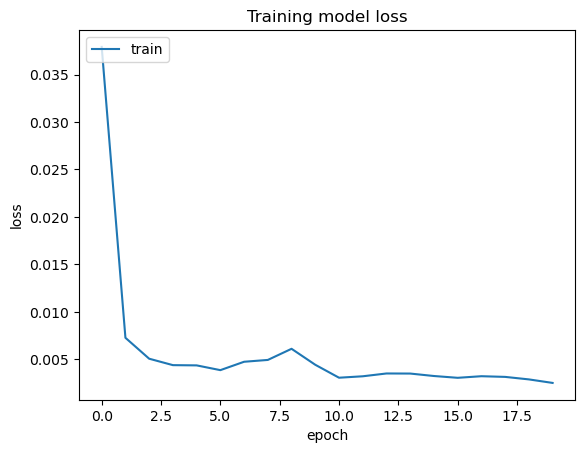

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('tata_test.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0:].values

inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(926, 60, 1)

In [13]:
y_pred=model.predict(X_test)
y_pred

29/29 [==============================] - 4s 72ms/step


array([[ 1.42311171e-01],
       [ 1.42960638e-01],
       [ 1.43568054e-01],
       [ 1.44255280e-01],
       [ 1.44898579e-01],
       [ 1.45370513e-01],
       [ 1.45566210e-01],
       [ 1.45445004e-01],
       [ 1.45072713e-01],
       [ 1.44725978e-01],
       [ 1.44798636e-01],
       [ 1.45604625e-01],
       [ 1.47222474e-01],
       [ 1.49598956e-01],
       [ 1.52571782e-01],
       [ 1.55917272e-01],
       [ 1.59308136e-01],
       [ 1.62555769e-01],
       [ 1.65465072e-01],
       [ 1.67795211e-01],
       [ 1.69375211e-01],
       [ 1.70220196e-01],
       [ 1.70082957e-01],
       [ 1.68852031e-01],
       [ 1.66630879e-01],
       [ 1.63820446e-01],
       [ 1.60774201e-01],
       [ 1.57643944e-01],
       [ 1.54570580e-01],
       [ 1.51777953e-01],
       [ 1.49509728e-01],
       [ 1.47896171e-01],
       [ 1.46895289e-01],
       [ 1.46395043e-01],
       [ 1.46285072e-01],
       [ 1.46416783e-01],
       [ 1.46691248e-01],
       [ 1.47190198e-01],
       [ 1.4

In [14]:
predicted_price=sc.inverse_transform(y_pred)

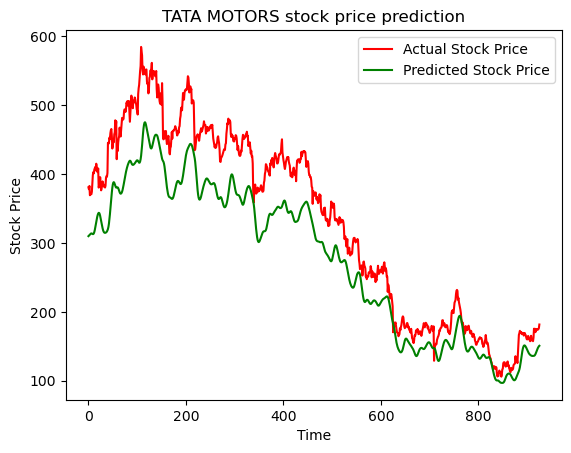

In [15]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('TATA MOTORS stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [16]:
sum(y_pred)/len(y_pred)

array([0.11481941], dtype=float32)

In [24]:
cutoff=0.114
y_pred_classes = np.zeros_like(y_pred)
y_pred_classes[y_pred>cutoff]=1

In [25]:
sum(y_test)/len(y_test)

array([330.14038877])

In [28]:
cutoff=330
y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > cutoff] = 1

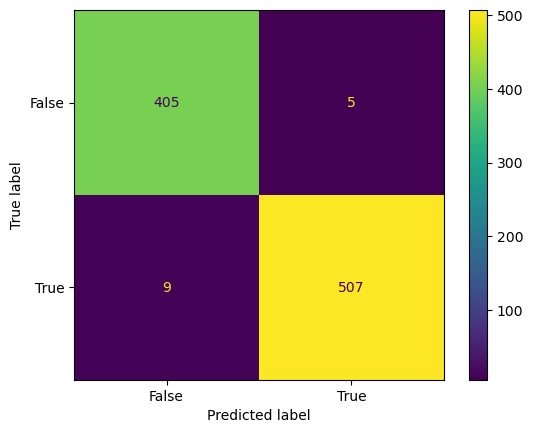

In [29]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_classes,y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [21]:
len(y_pred)

926